In [1]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.stats as stats
import sys

sys.path.insert(1, '/home/jaimerz/Documents/UCL/qp/src')
import qp

# Load Data

In [2]:
dummy = np.load('../src/qp/projectors/tests/dummy.npz')
zs = dummy['zs']
pzs = dummy['pzs']
cov = np.cov(pzs.T)
dz = np.mean(np.diff(zs))
zs_edges = np.append(zs - dz/2, zs[-1] + dz/2)
q = qp.Ensemble(qp.hist, data={"bins":zs_edges, "pdfs":pzs})

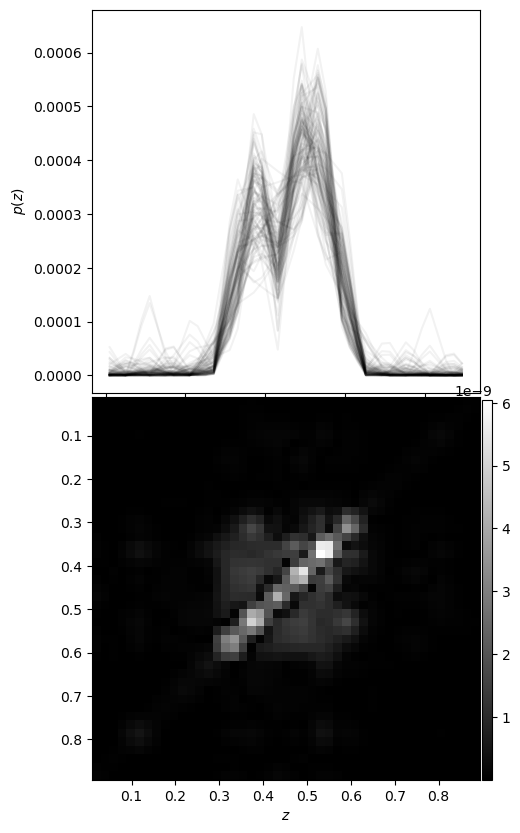

In [3]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    axis[0].plot(zs, pzs[i], 'k-', alpha=0.05)
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
plt.show()

# Shifts

In [12]:
shifts = qp.projectors.projector_shifts.ProjectorShifts(q)
#shifts = rp.ProjectorShifts(zs, pzs)
print(len(shifts.z), shifts.pzs.shape)

45 (100, 45)


In [13]:
pz_fid = [shifts.z, shifts.pz_mean]

In [14]:
shifted_pzs = np.array([shifts.evaluate_model(pz_fid, shifts.sample_prior())[1] for i in range(100)])

In [15]:
shifted_cov = np.cov(shifted_pzs.T)

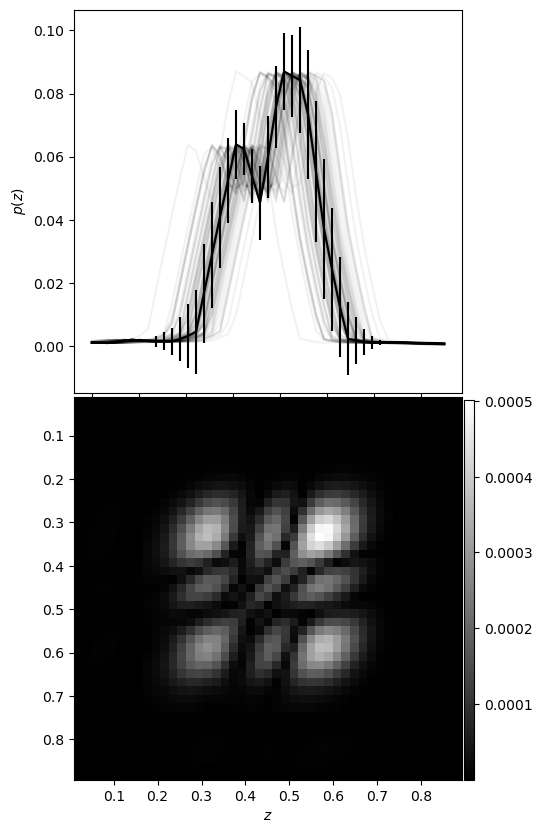

In [17]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    pz = shifted_pzs[i]
    axis[0].plot(shifts.z, pz, 'k-', alpha=0.05)
axis[0].errorbar(shifts.z, shifts.pz_mean, yerr=np.sqrt(np.diag(shifted_cov)), fmt='k-')
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(shifted_cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
#plt.savefig('docs/source/assets/shifts.png')
plt.show()

# Moments

In [21]:
moments = qp.projectors.projector_moments.ProjectorMoments(q)

The covariance matrix will be regularized
The covariance matrix will be diagonalized


In [22]:
moments_pzs = np.array([moments.evaluate_model(pz_fid, moments.sample_prior())[1] for i in range(100)])

In [23]:
moments_cov = np.cov(moments_pzs.T)

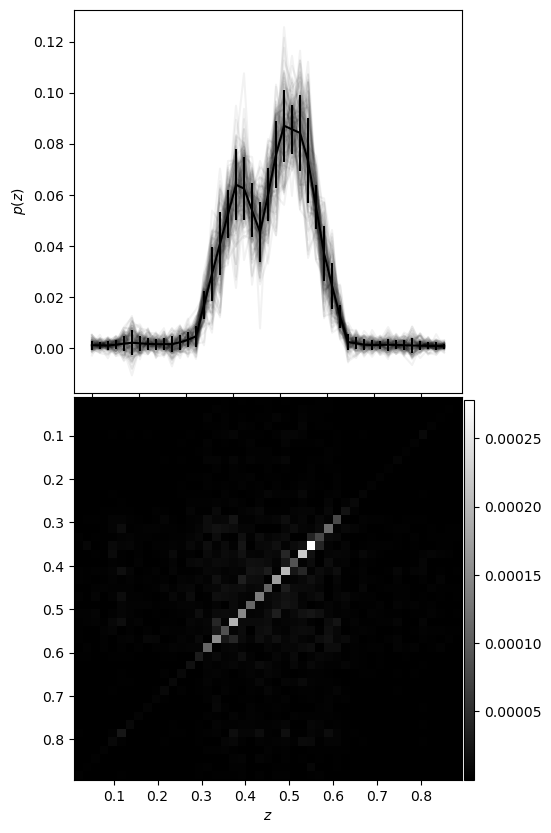

In [25]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    axis[0].plot(moments.z, moments_pzs[i], 'k-', alpha=0.05)
axis[0].errorbar(moments.z, moments.pz_mean, yerr=np.sqrt(np.diag(moments_cov)), fmt='k-')
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(moments_cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
#plt.savefig('docs/source/assets/moments.png')
plt.show()